In [1]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 피마 인디언 당뇨병 데이터셋을 불러옵니다. 불러올 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv('../dataset/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

# 처음 5줄을 봅니다.
print(df.head(5))

# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

# 각 정보별 특징을 좀더 자세히 출력합니다.
print(df.describe())

# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
print(df[['plasma', 'class']])

# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.gist_heat   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
         pregnant      plasma    pressure   thickness     insulin         BMI  \

<Figure size 1200x1200 with 2 Axes>

<Figure size 600x300 with 2 Axes>

Using TensorFlow backend.


11493376/11490434 [==============================] - 4s 0us/step


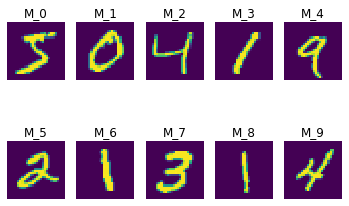

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dens

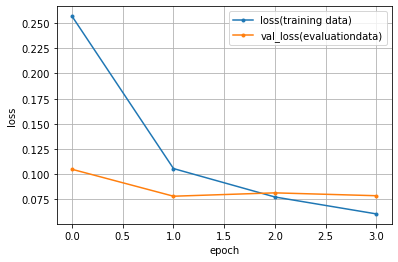

In [2]:
# coding: utf-8
# MNIST 샘플

# Keras를 임포트
import keras

# MINIST 데이터와 필요한 모듈 임포트
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger
%matplotlib inline
import matplotlib.pyplot as plt

# 배치 사이즈, 클래스 수, 에폭 수를 정의
batch_size = 128
num_classes = 10
epochs = 20

# MNIST 데이터 읽어 들이기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST 데이터 중 10장만 표시
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)
plt.show()

# 이미지 사이즈 정규화
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 확인을 위한 표시
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# 모델 작성
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

# 요약 출력
model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

# 학습 실행
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])


# 학습 결과 표시
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

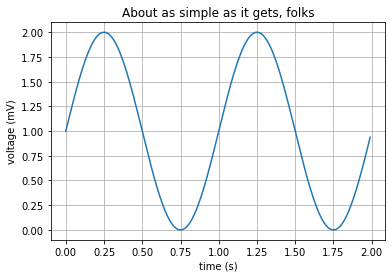

In [3]:
# coding: utf-8
# Matplotlib example

# 필요한 라이브러리 읽어 들이기
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 출력 데이터 준비
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

# 그래프 그리기
fig, ax = plt.subplots()
ax.plot(t, s)

# 그래프의 레이블과 그리드 그리기
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

# 그래프 표시
plt.show()

In [4]:
# coding: utf-8
# Conv2D를 사용한 CNN 예제

# CNN Model 8 - Binary Sigmoid
# 케라스와 그 외 라이브러리 임포트
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Conv2D
from keras.utils import np_utils

# SVG 표시에 필요한 라이브러리 임포트
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# 윈도우의 경우 다음을 추가
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# 합성곱 신경망→평활화→완전 연결 계층 2진 출력 모델 작성
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3, 3), input_shape=(6, 6, 1), padding='same', name='Conv2D_1'))
model.add(Flatten(name='Flatten_1'))
model.add(Dense(units=1, activation='sigmoid', name='Dense_1'))

# SVG 형식으로 표시
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.